Selected Features by Lasso: 
petal length (cm)    0.304309
petal width (cm)     0.378882
dtype: float64
Lasso Model performance (R^2 score): 0.9356732855719233

Feature Importances by Random Forest: 
sepal length (cm)    0.108098
sepal width (cm)     0.030387
petal length (cm)    0.439994
petal width (cm)     0.421522
dtype: float64


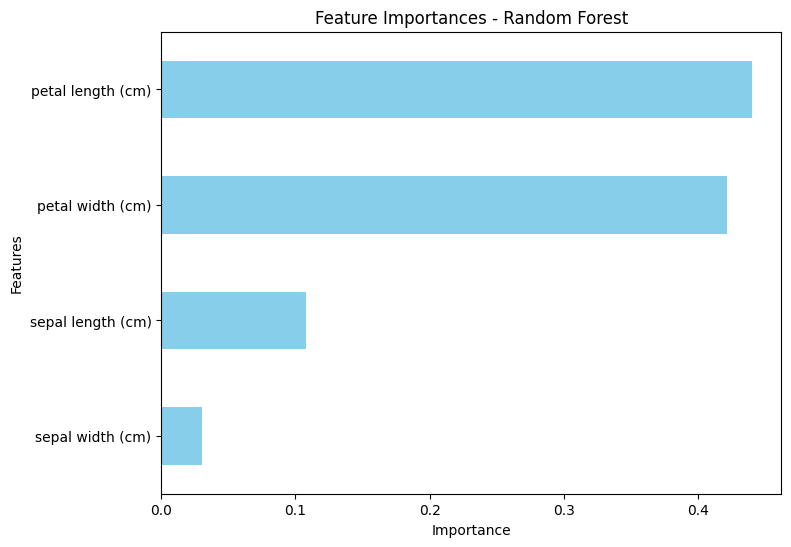

Random Forest Model performance (Accuracy score): 1.0


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Lasso Regression for feature selection
lasso = Lasso(alpha=0.1)  # The regularization strength is controlled by alpha
lasso.fit(X_train_scaled, y_train)

# Get the coefficients of the features
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Print non-zero coefficients (selected features)
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0]
print(f"Selected Features by Lasso: \n{selected_features_lasso}")

# Evaluate the Lasso model performance on the test set
lasso_test_score = lasso.score(X_test_scaled, y_test)
print(f"Lasso Model performance (R^2 score): {lasso_test_score}")

# Apply Random Forest for feature selection and classification
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get the feature importances from Random Forest
rf_feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Print the feature importances
print(f"\nFeature Importances by Random Forest: \n{rf_feature_importances}")

# Plot the Random Forest feature importances
plt.figure(figsize=(8, 6))
rf_feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Evaluate the Random Forest model performance on the test set
rf_test_score = rf.score(X_test, y_test)
print(f"Random Forest Model performance (Accuracy score): {rf_test_score}")
